In [3]:
import ujson
import datetime as dt
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
lines = []
with open("/Users/anokhin/Desktop/holidays_2015.txt") as tlf:    
    n_lines_read = 0
    for line in tlf:
        hid, json_str = line.strip().split("\t")
                
        json = ujson.loads(json_str)        
        
        data_n = {'hid': hid, "type": "count"}
        data_p = {'hid': hid, "type": "price"}
        for day, (n, p) in json:
            date = dt.datetime.strptime(day, "%Y%m%d").date()
            data_n[date] = n
            data_p[date] = p
                
        lines.append(data_n)
        lines.append(data_p)
            
        n_lines_read += 1
#         if n_lines_read > 2500:
#             break

df = pd.DataFrame(lines, columns=['hid', 'type'] + [dt.date(2015, 1, 1) + dt.timedelta(days=d) for d in xrange(365)]).set_index(['hid', 'type']).fillna(0)

df.head()

2015-01-01  2015-01-02  2015-01-03  2015-01-04  \
hid          type                                                    
440101607549 count           0           0           0           0   
             price           0           0           0           0   
440156860249 count           0           0           0           0   
             price           0           0           0           0   
441065955167 count           0           0           0           0   

                    2015-01-05  2015-01-06  2015-01-07  2015-01-08  \
hid          type                                                    
440101607549 count           0           0           0           0   
             price           0           0           0           0   
440156860249 count           0           0           0           0   
             price           0           0           0           0   
441065955167 count           0           0           0           0   

                    2015-01-09  2015-01-10     ...      2015-12-22  \
hid          type                              ...                   
440101607549 count           0           0     ...               0   
             price           0           0     ...               0   
440156860249 count           0           0     ...               0   
             price           0           0     ...               0   
441065955167 count           0           0     ...               0   

                    2015-12-23  2015-12-24  2015-12-25  2015-12-26  \
hid          type                                                    
440101607549 count           0           0           0           0   
             price           0           0           0           0   
440156860249 count           0           0           0           0   
             price           0           0           0           0   
441065955167 count           0           0           0           0   

                    2015-12-27  2015-12-28  2015-12-29  2015-12-30  2015-12-31  
hid          type                                                               
440101607549 count           0           0           0           0           0  
             price           0           0           0           0           0  
440156860249 count           0           0           0           0           0  
             price           0           0           0           0           0  
441065955167 count           0           0           0           0           0  

[5 rows x 365 columns]

In [61]:
print df.ix["0", "count"]

2015-01-01    12257
2015-01-02     6787
2015-01-03     8010
2015-01-04     6671
2015-01-05     7044
2015-01-06     7126
2015-01-07     6746
2015-01-08     5728
2015-01-09     6025
2015-01-10     6592
2015-01-11     6417
2015-01-12     6048
2015-01-13     6512
2015-01-14     7086
2015-01-15     6630
2015-01-16     6469
2015-01-17     6507
2015-01-18     7159
2015-01-19     6596
2015-01-20     6203
2015-01-21     6589
2015-01-22     6910
2015-01-23     8882
2015-01-24     9412
2015-01-25     8380
2015-01-26     9150
2015-01-27     8787
2015-01-28     9387
2015-01-29     9600
2015-01-30     8747
              ...  
2015-12-02     9372
2015-12-03    11962
2015-12-04    12843
2015-12-05    10743
2015-12-06    10565
2015-12-07    10838
2015-12-08        0
2015-12-09        0
2015-12-10        0
2015-12-11        0
2015-12-12        0
2015-12-13        0
2015-12-14        0
2015-12-15        0
2015-12-16        0
2015-12-17        0
2015-12-18        0
2015-12-19        0
2015-12-20        0


In [29]:
df_counts = df.swaplevel(0, 1, 0).ix["count"]
df_prices = df.swaplevel(0, 1, 0).ix["price"]

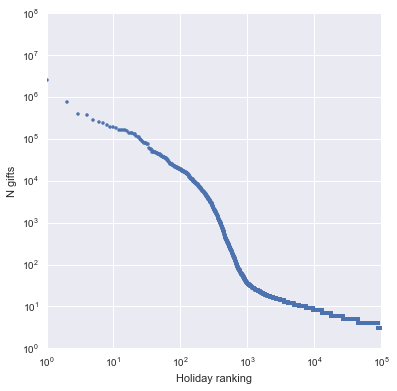

In [39]:
counts = df_counts.sum(axis=1).sort_values()[::-1]

pl.figure(figsize=(6, 6))
pl.plot(range(100000), counts[:100000], '.')

pl.gca().set_xscale('log')
pl.gca().set_yscale('log')

pl.xlabel('Holiday ranking')
pl.ylabel('N gifts')

pl.show()

In [110]:
main_holidays_df = df_counts[df_counts.max(axis=1) > 40000]
sort_ind = main_holidays_df.sum(axis=1).sort_values()[::-1].index
main_holidays_df = main_holidays_df.ix[sort_ind[1:]]
main_holidays_df.head()

,2015-01-01,2015-01-02,2015-01-03,2015-01-04,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-10,...,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31
hid,,,,,,,,,,,,,,,,,,,,,
451909823488,4,1,1,1,0,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
451909822464,17,5,3,3,2,11,21,2,6,11,...,0,0,0,0,0,0,0,0,0,0
451909819904,220,7009,5126,14343,21636,130181,144340,16013,14706,10366,...,0,0,0,0,0,0,0,0,0,0
451909825536,2,1,1,1,2,1,13,0,0,2,...,0,0,0,0,0,0,0,0,0,0
451909823232,5,1,1,0,3,13,8,1,2,0,...,0,0,0,0,0,0,0,0,0,0


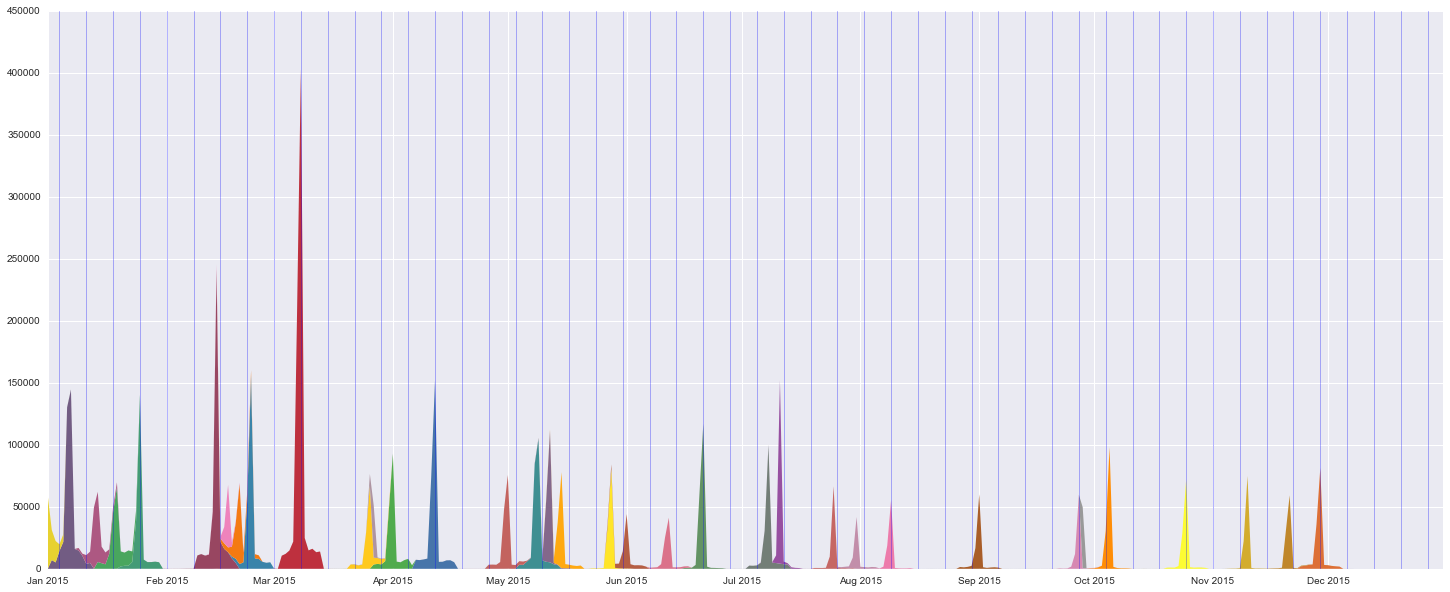

In [111]:
pl.figure(figsize=(25, 10))
cm = pl.get_cmap('Set1')
colors=[cm(int((i + 1) * 1.0 / main_holidays_df.shape[0] * 256)) for i in xrange(main_holidays_df.shape[0])]
pl.stackplot(main_holidays_df.columns, main_holidays_df.values, baseline='zero', colors=colors, lw=0, alpha=1.0)
# pl.xticks(df.columns, [d.strftime("%m-%d") for d in df.columns], rotation='vertical')
for col in main_holidays_df.columns:
    if col.weekday() == 6:        
        pl.axvline(x=col, lw=1, alpha=0.3)
pl.show()

In [112]:
def find_date(s):
    return s.index[s.values > 40000].tolist()

dates = []
for hid, row in main_holidays_df.iterrows():
    print hid, find_date(row)
    dates.extend(find_date(row))
    
print dates

451909823488 [datetime.date(2015, 3, 7), datetime.date(2015, 3, 8)]
451909822464 [datetime.date(2015, 2, 13), datetime.date(2015, 2, 14)]
451909819904 [datetime.date(2015, 1, 6), datetime.date(2015, 1, 7)]
451909825536 [datetime.date(2015, 4, 11), datetime.date(2015, 4, 12)]
451909823232 [datetime.date(2015, 2, 22), datetime.date(2015, 2, 23)]
462405165056 [datetime.date(2015, 5, 8), datetime.date(2015, 5, 9)]
451909821184 [datetime.date(2015, 1, 25)]
451909820672 [datetime.date(2015, 1, 18), datetime.date(2015, 1, 19)]
451909825280 [datetime.date(2015, 3, 31), datetime.date(2015, 4, 1)]
451909832448 [datetime.date(2015, 6, 20), datetime.date(2015, 6, 21)]
462405168896 [datetime.date(2015, 7, 8)]
462405165312 [datetime.date(2015, 5, 11), datetime.date(2015, 5, 12)]
462405169152 [datetime.date(2015, 7, 11)]
462405159680 [datetime.date(2015, 1, 13), datetime.date(2015, 1, 14)]
451909827328 [datetime.date(2015, 4, 30), datetime.date(2015, 5, 1)]
451909850112 [datetime.date(2015, 11, 29)]
